<a href="https://colab.research.google.com/github/YugantGotmare/Machine-Learning-Projects/blob/master/Top_6_Economies_in_the_world_by_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [111]:
df = pd.read_csv('/content/top_six_economies.csv')

In [112]:
df.head()

,Unnamed: 0,Country Name,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
0,33,United States,1991,6.158129e+12,6.158129e+12,24342.258905,-0.108265,10.125543,9.660905,44.061597,1.592729e+11,6.80,4.234964,0.021110,252981000.0,1.336261,75.365854,0.5
1,34,United States,1992,6.520327e+12,6.520327e+12,25418.990776,3.522441,10.241680,9.708915,46.050144,1.475259e+11,7.50,3.028820,0.027545,256514000.0,1.386886,75.617073,0.5
2,35,United States,1993,6.858559e+12,6.858559e+12,26387.293734,2.751781,10.497438,9.547180,48.246140,1.646202e+11,6.90,2.951657,0.026536,259919000.0,1.318680,75.419512,0.5
3,36,United States,1994,7.287236e+12,7.287236e+12,27694.853416,4.028793,11.162312,9.893147,47.353482,1.635906e+11,6.12,2.607442,0.026663,263126000.0,1.226296,75.619512,0.5
4,37,United States,1995,7.639749e+12,7.639749e+12,28690.875701,2.684217,11.814158,10.639224,47.209535,1.759954e+11,5.65,2.805420,0.028522,266278000.0,1.190787,75.621951,0.5


In [113]:
df.sample(10)

,Unnamed: 0,Country Name,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
132,45,United Kingdom,2003,2.057094e+12,1.810619e+12,34487.467572,3.029890,26.155702,23.929617,39.271252,5.634968e+10,4.810,1.376500,0.276534,5.964758e+07,0.465641,78.446341,0.2
172,55,India,2013,1.856722e+12,6.477518e+12,1449.610451,6.386106,28.413271,25.430861,50.311827,2.980925e+11,5.424,10.017878,3.768489,1.280842e+09,1.182904,67.931000,NaN
18,51,United States,2009,1.447806e+13,1.447806e+13,47194.943355,-2.599888,13.827311,10.932221,76.024656,4.040989e+11,9.250,-0.355546,0.039646,3.067715e+08,0.876651,78.390244,1.0
36,39,China,1997,9.616040e+11,2.788246e+12,781.744164,9.236780,15.039853,19.493164,NaN,1.464480e+11,3.230,2.786465,0.477223,1.230075e+09,1.023450,70.428000,NaN
46,49,China,2007,3.550343e+12,8.986557e+12,2693.970063,14.230861,26.758565,35.434799,NaN,1.546365e+12,4.350,4.816768,0.192464,1.317885e+09,0.522272,73.553000,NaN
149,62,United Kingdom,2020,2.756900e+12,3.121072e+12,41098.078653,-9.270411,28.066701,28.362276,NaN,1.800541e+11,4.472,0.989487,0.117817,6.708100e+07,0.365409,80.902439,NaN
111,54,Germany,2012,3.527143e+12,3.487233e+12,43855.854466,0.418498,40.206935,46.307120,NaN,2.488565e+11,5.380,2.008491,0.414983,8.042582e+07,0.187728,80.539024,0.0
126,39,United Kingdom,1997,1.559569e+12,1.344183e+12,26742.984847,4.909026,25.184104,25.499772,44.955778,3.766230e+10,7.070,2.201143,0.105726,5.831695e+07,0.257553,77.210976,0.2
168,51,India,2009,1.341887e+12,4.763056e+12,1101.960838,7.861889,25.872350,20.400519,55.256446,2.846829e+11,5.544,10.882353,3.666771,1.217726e+09,1.410583,66.244000,32.8
173,56,India,2014,2.039127e+12,6.781022e+12,1573.885642,7.410228,25.954223,22.967963,NaN,3.250810e+11,5.436,6.665657,3.451900,1.295601e+09,1.145673,68.286000,NaN


In [114]:
df.shape

(180, 18)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Unnamed: 0                                                           180 non-null    int64  
 1   Country Name                                                         180 non-null    object 
 2   Year                                                                 180 non-null    int64  
 3   GDP (current US$)                                                    180 non-null    float64
 4   GDP, PPP (current international $)                                   180 non-null    float64
 5   GDP per capita (current US$)                                         180 non-null    float64
 6   GDP growth (annual %)                                                180 non-null    float64
 7   Imports 

In [116]:
df.isnull().sum()

Unnamed: 0                                                              0
Country Name                                                            0
Year                                                                    0
GDP (current US$)                                                       0
GDP, PPP (current international $)                                      0
GDP per capita (current US$)                                            0
GDP growth (annual %)                                                   0
Imports of goods and services (% of GDP)                                0
Exports of goods and services (% of GDP)                                0
Central government debt, total (% of GDP)                              70
Total reserves (includes gold, current US$)                             0
Unemployment, total (% of total labor force) (modeled ILO estimate)     0
Inflation, consumer prices (annual %)                                   0
Personal remittances, received (% of G

In [117]:
df.isnull().mean()*100

Unnamed: 0                                                              0.000000
Country Name                                                            0.000000
Year                                                                    0.000000
GDP (current US$)                                                       0.000000
GDP, PPP (current international $)                                      0.000000
GDP per capita (current US$)                                            0.000000
GDP growth (annual %)                                                   0.000000
Imports of goods and services (% of GDP)                                0.000000
Exports of goods and services (% of GDP)                                0.000000
Central government debt, total (% of GDP)                              38.888889
Total reserves (includes gold, current US$)                             0.000000
Unemployment, total (% of total labor force) (modeled ILO estimate)     0.000000
Inflation, consumer prices (

In [118]:
df.describe()

,Unnamed: 0,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
count,180.000000,180.000000,1.800000e+02,1.800000e+02,180.000000,180.000000,180.000000,180.000000,110.000000,1.800000e+02,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000,105.000000
mean,47.500000,2005.500000,4.915372e+12,6.021108e+12,26376.931900,3.513787,20.936557,21.069824,69.822765,5.109257e+11,5.480500,3.000194,0.586275,5.022409e+08,0.658615,75.829267,3.903810
std,8.679585,8.679585,4.850229e+12,5.498880e+12,18889.690619,3.902745,8.616195,10.131047,41.427466,8.280057e+11,1.925758,3.493714,1.033842,5.236481e+08,0.579099,6.098353,10.852392
min,33.000000,1991.000000,2.701053e+11,9.999738e+11,301.159002,-9.270411,6.936003,8.494241,15.165693,7.615987e+09,2.100000,-1.401473,0.010159,5.742490e+07,-1.853715,58.353000,0.000000
25%,40.000000,1998.000000,1.813307e+12,2.326055e+12,2092.483300,1.480449,14.037575,12.315318,43.619145,9.781159e+10,4.357500,1.169118,0.039369,8.208698e+07,0.251178,73.199500,0.100000
50%,47.500000,2005.500000,3.040935e+12,3.718680e+12,30398.112072,2.682224,19.370572,19.538772,54.972769,1.785450e+11,5.265000,2.082156,0.172921,1.905255e+08,0.631485,77.432927,0.300000
75%,55.000000,2013.000000,5.353511e+12,7.644812e+12,41517.780765,6.234838,27.039266,26.124877,93.007495,4.488585e+11,6.057500,3.738942,0.309749,1.148402e+09,1.015808,80.250793,1.000000
max,62.000000,2020.000000,2.137257e+13,2.425580e+13,65094.799429,14.230861,41.133361,47.301046,194.823099,3.900039e+12,11.170000,24.256990,4.168610,1.411100e+09,2.039729,84.615610,56.700000


In [119]:
df.duplicated().sum()

0

In [120]:
df.drop(columns=['Central government debt, total (% of GDP)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],inplace=True)

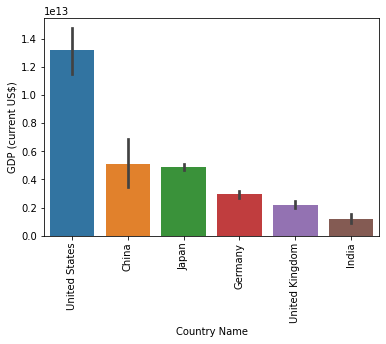

In [121]:
sns.barplot(x=df['Country Name'],y=df['GDP (current US$)'])
plt.xticks(rotation='vertical')
plt.show()

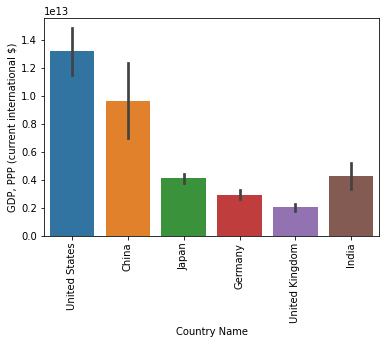

In [122]:
sns.barplot(x=df['Country Name'],y=df['GDP, PPP (current international $)'])
plt.xticks(rotation='vertical')
plt.show()

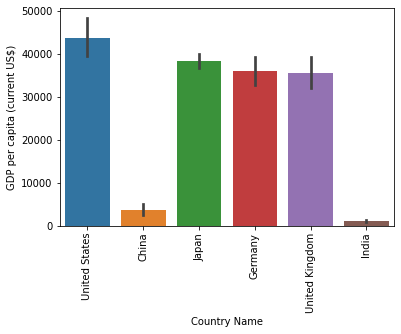

In [123]:
sns.barplot(x=df['Country Name'],y=df['GDP per capita (current US$)'])
plt.xticks(rotation='vertical')
plt.show()

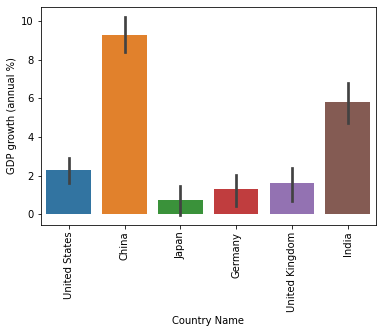

In [124]:
sns.barplot(x=df['Country Name'],y=df['GDP growth (annual %)'])
plt.xticks(rotation='vertical')
plt.show()

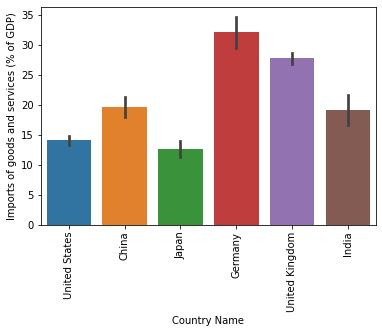

In [125]:
sns.barplot(x=df['Country Name'],y=df['Imports of goods and services (% of GDP)'])
plt.xticks(rotation='vertical')
plt.show()

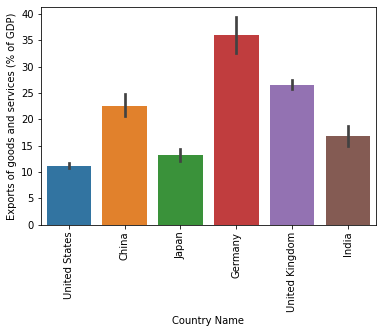

In [126]:
sns.barplot(x=df['Country Name'],y=df['Exports of goods and services (% of GDP)'])
plt.xticks(rotation='vertical')
plt.show()

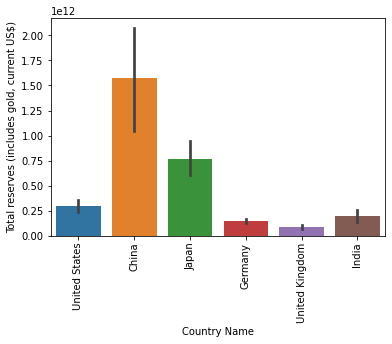

In [127]:
sns.barplot(x=df['Country Name'],y=df['Total reserves (includes gold, current US$)'])
plt.xticks(rotation='vertical')
plt.show()

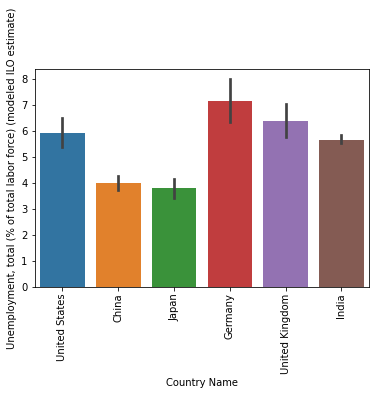

In [128]:
sns.barplot(x=df['Country Name'],y=df['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
plt.xticks(rotation='vertical')
plt.show()

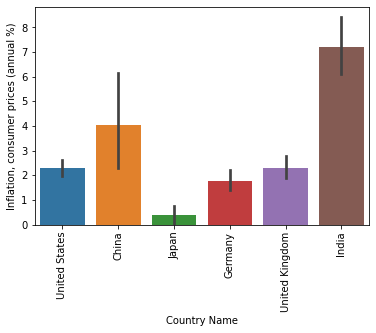

In [129]:
sns.barplot(x=df['Country Name'],y=df['Inflation, consumer prices (annual %)'])
plt.xticks(rotation='vertical')
plt.show()

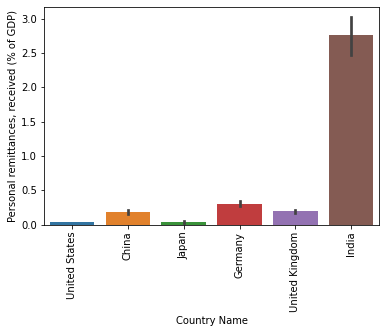

In [130]:
sns.barplot(x=df['Country Name'],y=df['Personal remittances, received (% of GDP)'])
plt.xticks(rotation='vertical')
plt.show()

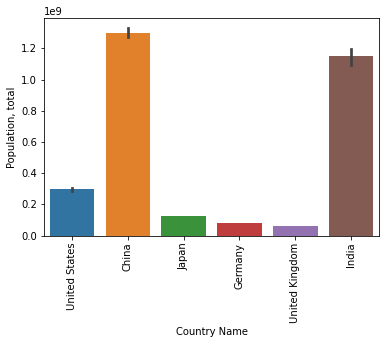

In [131]:
sns.barplot(x=df['Country Name'],y=df['Population, total'])
plt.xticks(rotation='vertical')
plt.show()

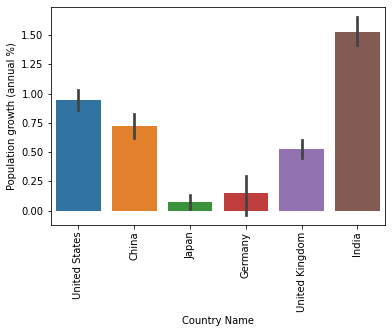

In [132]:
sns.barplot(x=df['Country Name'],y=df['Population growth (annual %)'])
plt.xticks(rotation='vertical')
plt.show()

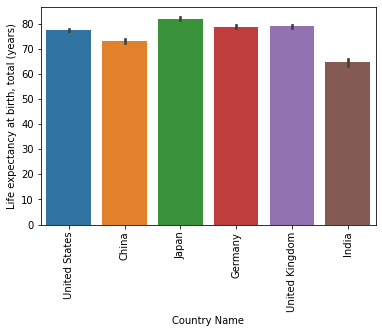

In [133]:
sns.barplot(x=df['Country Name'],y=df['Life expectancy at birth, total (years)'])
plt.xticks(rotation='vertical')
plt.show()

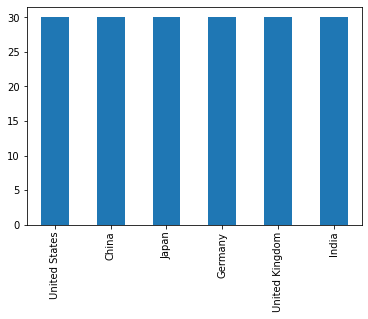

In [136]:
df['Country Name'].value_counts().plot(kind='bar')

In [137]:
df['Country Name'].value_counts()

United States     30
China             30
Japan             30
Germany           30
United Kingdom    30
India             30
Name: Country Name, dtype: int64

In [138]:
df.drop(columns=['Country Name'],inplace=True)

In [139]:
df.head()

,Unnamed: 0,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,33,1991,6.158129e+12,6.158129e+12,24342.258905,-0.108265,10.125543,9.660905,1.592729e+11,6.80,4.234964,0.021110,252981000.0,1.336261,75.365854
1,34,1992,6.520327e+12,6.520327e+12,25418.990776,3.522441,10.241680,9.708915,1.475259e+11,7.50,3.028820,0.027545,256514000.0,1.386886,75.617073
2,35,1993,6.858559e+12,6.858559e+12,26387.293734,2.751781,10.497438,9.547180,1.646202e+11,6.90,2.951657,0.026536,259919000.0,1.318680,75.419512
3,36,1994,7.287236e+12,7.287236e+12,27694.853416,4.028793,11.162312,9.893147,1.635906e+11,6.12,2.607442,0.026663,263126000.0,1.226296,75.619512
4,37,1995,7.639749e+12,7.639749e+12,28690.875701,2.684217,11.814158,10.639224,1.759954e+11,5.65,2.805420,0.028522,266278000.0,1.190787,75.621951


In [140]:
X = df.drop(columns=['GDP (current US$)'])
Y = np.log(df['GDP (current US$)'])

In [141]:
X.head()

,Unnamed: 0,Year,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,33,1991,6.158129e+12,24342.258905,-0.108265,10.125543,9.660905,1.592729e+11,6.80,4.234964,0.021110,252981000.0,1.336261,75.365854
1,34,1992,6.520327e+12,25418.990776,3.522441,10.241680,9.708915,1.475259e+11,7.50,3.028820,0.027545,256514000.0,1.386886,75.617073
2,35,1993,6.858559e+12,26387.293734,2.751781,10.497438,9.547180,1.646202e+11,6.90,2.951657,0.026536,259919000.0,1.318680,75.419512
3,36,1994,7.287236e+12,27694.853416,4.028793,11.162312,9.893147,1.635906e+11,6.12,2.607442,0.026663,263126000.0,1.226296,75.619512
4,37,1995,7.639749e+12,28690.875701,2.684217,11.814158,10.639224,1.759954e+11,5.65,2.805420,0.028522,266278000.0,1.190787,75.621951


In [142]:
Y.head

<bound method NDFrame.head of 0      29.448794
1      29.505946
2      29.556518
3      29.617145
4      29.664386
         ...    
175    28.461666
176    28.606136
177    28.625357
178    28.671846
179    28.612233
Name: GDP (current US$), Length: 180, dtype: float64>

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=2)

In [144]:
X_train.head()

,Unnamed: 0,Year,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
99,42,2000,2.236074e+12,23694.760483,2.912503,30.678349,30.847712,8.749687e+10,7.92,1.440268,0.184986,8.221151e+07,0.135432,77.926829
142,55,2013,2.579159e+12,43713.814124,1.890018,31.080805,29.773890,1.187502e+11,7.52,2.291667,0.171388,6.412827e+07,0.669741,81.004878
161,44,2002,2.499147e+12,470.986787,3.803975,15.244279,14.264384,7.160787e+10,5.53,4.297152,3.055851,1.093317e+09,1.689562,63.304000
57,60,2018,2.173654e+13,9905.342004,6.749774,18.453681,19.112104,3.168216e+12,4.28,2.074790,0.174926,1.402760e+09,0.467672,76.704000
71,44,2002,3.647933e+12,32820.793643,0.041962,9.591676,10.855446,4.696181e+11,5.39,-0.923494,0.026940,1.274450e+08,0.232527,81.563415


In [145]:
print(X.shape, X_train.shape, X_test.shape)

(180, 14) (126, 14) (54, 14)


In [146]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = SVR()
model4 = RandomForestRegressor()
model5 = Lasso()
model6 = KNeighborsRegressor()

In [148]:
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)
model5.fit(X_train, Y_train)
model6.fit(X_train, Y_train)

KNeighborsRegressor()

In [151]:
X_train_prediction = model1.predict(X_train)
X_train_prediction2 = model2.predict(X_train)
X_train_prediction3 = model3.predict(X_train)
X_train_prediction4 = model4.predict(X_train)
X_train_prediction5 = model5.predict(X_train)
X_train_prediction6 = model6.predict(X_train)

In [152]:
print('R2 score Linear',r2_score(Y_train,X_train_prediction))
print('R2 score Decision',r2_score(Y_train,X_train_prediction2))
print('R2 score SVM',r2_score(Y_train,X_train_prediction3))
print('R2 score Random Forest',r2_score(Y_train,X_train_prediction4))
print('R2 score Lasso',r2_score(Y_train,X_train_prediction5))
print('R2 score Lasso',r2_score(Y_train,X_train_prediction6))

R2 score Linear 0.9491393753802894
R2 score Decision 1.0
R2 score SVM 0.5478750060422706
R2 score Random Forest 0.997046539907157
R2 score Lasso 0.8980280580624055
R2 score Lasso 0.731701011434381
